# Error analysis

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
file = open("data/pred.pkl", "rb")
pred = pickle.load(file)
print(len(pred))

75


In [117]:
file = open("data/gold.pkl", "rb")
gold = pickle.load(file)
print(len(gold))

74


In [6]:
file = open("data/gold_split.pkl", "rb")
gold_split = pickle.load(file)
print(len(gold_split))

74


In [18]:
def identified_score(span, pred_spans):
    max_int = 0
    for p in pred_spans:
        start = max(span[0], p[0])
        end = min(span[1], p[1])
        intersection = end - start 
        max_int = intersection if intersection > max_int else max_int
    return max_int/(span[1]-span[0])

### Absolute number of missed, partially identified and identified spans

Loaded_Language , 51 , 23 , 251 , 325
Name_Calling , 35 , 18 , 130 , 183
Labeling , 35 , 18 , 130 , 183
Repetition , 56 , 3 , 86 , 145
Flag-Waving , 18 , 19 , 50 , 87
Exaggeration , 28 , 12 , 28 , 68
Minimisation , 28 , 12 , 28 , 68
Doubt , 42 , 18 , 6 , 66
Appeal_to_fear-prejudice , 9 , 17 , 18 , 44
Slogans , 10 , 4 , 26 , 40
Whataboutism , 17 , 8 , 4 , 29
Straw_Men , 17 , 8 , 4 , 29
Red_Herring , 17 , 8 , 4 , 29
Black-and-White_Fallacy , 14 , 8 , 0 , 22
Causal_Oversimplification , 13 , 4 , 1 , 18
Thought-terminating_Cliches , 9 , 3 , 5 , 17
Appeal_to_Authority , 7 , 1 , 6 , 14
Bandwagon , 4 , 1 , 0 , 5
Reductio_ad_hitlerum , 4 , 1 , 0 , 5
Total , 414 , 186 , 777 , 1377


/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


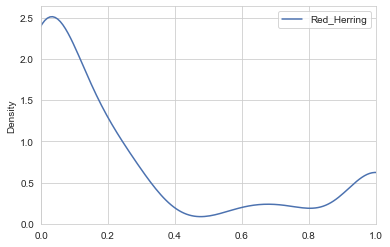

/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


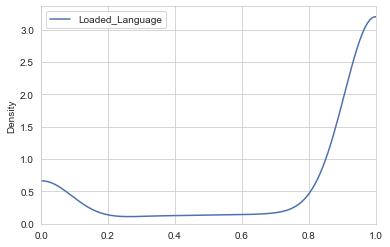

/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


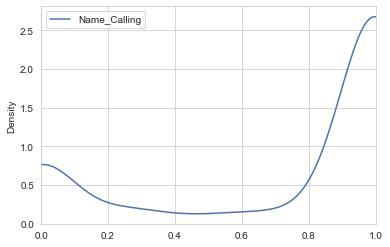

/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


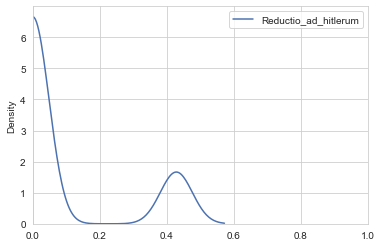

In [108]:
prop_categories = {}
for id, spans in gold_split.items():
    predicted = pred[id]
    for s in spans:
        score = identified_score(s, predicted)
        if s[2] not in prop_categories:
            prop_categories[s[2]] = {"segm":[1, 0, 0, 0], "dist":[]}
        else:
            prop_categories[s[2]]["segm"][0] += 1
        if score >= 0.75:
            prop_categories[s[2]]["segm"][3] += 1
        elif score >= 0.15:
            prop_categories[s[2]]["segm"][2] += 1
        else:
            prop_categories[s[2]]["segm"][1] += 1
        prop_categories[s[2]]["dist"].append(score)

ordered_cat = [[name, val["segm"][1], val["segm"][2], val["segm"][3], val["segm"][0]] for name, val in prop_categories.items()]
ordered_cat.sort(key=lambda y: y[4], reverse=True)

sum = [0,0,0,0]
for cat in ordered_cat:
    for i in range(1,5):
        sum[i-1] += cat[i]
    print(cat[0], ",", cat[1], ",", cat[2], ",", cat[3], ",", cat[4])
print("Total ,", sum[0], ",",sum[1], ",",sum[2], ",", sum[3])

i = 0
for name, cat in prop_categories.items():
    if name == "Loaded_Language" or name == "Name_Calling" or name=="Reductio_ad_hitlerum" or name=="Red_Herring":
        sns.set_style('whitegrid')
        sns.set_palette("deep")
        # g=sns.distplot(np.array(cat["dist"]), hist=True, kde=False, 
        #      color = 'darkblue', 
        #      hist_kws={'edgecolor':'black'},
        #      kde_kws={'linewidth': 4})
        g = sns.kdeplot(np.array(cat["dist"]), bw=0.25, label=name,  legend=True)
        g.set(xlim=(0, 1))  
        plt.savefig("sk"+name+'.png')
        plt.legend()
        plt.show()

### Percentages of missed, partially identified and identified spans

In [109]:
for cat in ordered_cat:
    print(cat[0], ",", cat[1]/cat[4], ",", cat[2]/cat[4], ",", cat[3]/cat[4])

Loaded_Language , 0.15692307692307692 , 0.07076923076923076 , 0.7723076923076924
Name_Calling , 0.1912568306010929 , 0.09836065573770492 , 0.7103825136612022
Labeling , 0.1912568306010929 , 0.09836065573770492 , 0.7103825136612022
Repetition , 0.38620689655172413 , 0.020689655172413793 , 0.593103448275862
Flag-Waving , 0.20689655172413793 , 0.21839080459770116 , 0.5747126436781609
Exaggeration , 0.4117647058823529 , 0.17647058823529413 , 0.4117647058823529
Minimisation , 0.4117647058823529 , 0.17647058823529413 , 0.4117647058823529
Doubt , 0.6363636363636364 , 0.2727272727272727 , 0.09090909090909091
Appeal_to_fear-prejudice , 0.20454545454545456 , 0.38636363636363635 , 0.4090909090909091
Slogans , 0.25 , 0.1 , 0.65
Whataboutism , 0.5862068965517241 , 0.27586206896551724 , 0.13793103448275862
Straw_Men , 0.5862068965517241 , 0.27586206896551724 , 0.13793103448275862
Red_Herring , 0.5862068965517241 , 0.27586206896551724 , 0.13793103448275862
Black-and-White_Fallacy , 0.6363636363636364

### Number of predicted spans which contains at least 1 character of a golden span inside.

In [130]:
total = 0
one_inside = 0
for id, spans in pred.items():
    if id in gold:
        gold_spans = gold[id]
        for s in spans:
            if identified_score(s, gold_spans) > 0:
                one_inside += 1
            total +=1
print(one_inside/total)

0.3974358974358974


### IoU score for predictions

In [7]:
def iou(span, pred_spans):
    max_iou = 0
    for p in pred_spans:
        start = max(span[0], p[0])
        end = min(span[1], p[1])
        intersection = end - start
        start = min(span[0], span[0])
        end = max(span[1], span[1])
        union = end - start if intersection > 0 else 0
        if intersection > 0:
            max_iou = intersection/union if intersection/union > max_iou else max_iou
    return max_iou

In [8]:
file = open("data/pred_original.pkl", "rb")
pred = pickle.load(file)
print(len(pred))

75


In [9]:
ious = {}
for id, spans in gold_split.items():
    predicted = pred[id]
    for s in spans:
        score = iou(s, predicted)
        if s[2] not in ious:
            ious[s[2]] = [score]
        else:
            ious[s[2]].append(score)
    
for key, val in ious.items():
    print(key, np.mean(val))


Repetition 0.5977557599804838
Whataboutism 0.24575961783384662
Straw_Men 0.24575961783384662
Red_Herring 0.24575961783384662
Loaded_Language 0.7978549456054069
Name_Calling 0.7424248255771185
Labeling 0.7424248255771185
Flag-Waving 0.6513204957520013
Causal_Oversimplification 0.11342133488535448
Doubt 0.19997548606229493
Thought-terminating_Cliches 0.3354835654068391
Exaggeration 0.47710107285509445
Minimisation 0.47710107285509445
Black-and-White_Fallacy 0.11799323372263903
Slogans 0.6947207857036937
Appeal_to_fear-prejudice 0.53656394809226
Bandwagon 0.08214285714285714
Reductio_ad_hitlerum 0.08214285714285714
Appeal_to_Authority 0.46587845729150074
